
**Normal Distribution and Z Score: Math and statistics for data science**

In [9]:
import pandas as pd
import seaborn as sns

In [10]:
df=pd.read_csv("/Users/sambhaji/Downloads/height.csv")
df.head()

,Gender,Height
0,Male,73.847017
1,Male,68.781904
2,Male,74.110105
3,Male,71.730978
4,Male,69.881796


**(1)Outlier detection and removal using Standard Deviation**

In [12]:
df.Height.describe()

count    10000.000000
mean        66.367560
std          3.847528
min         54.263133
25%         63.505620
50%         66.318070
75%         69.174262
max         78.998742
Name: Height, dtype: float64

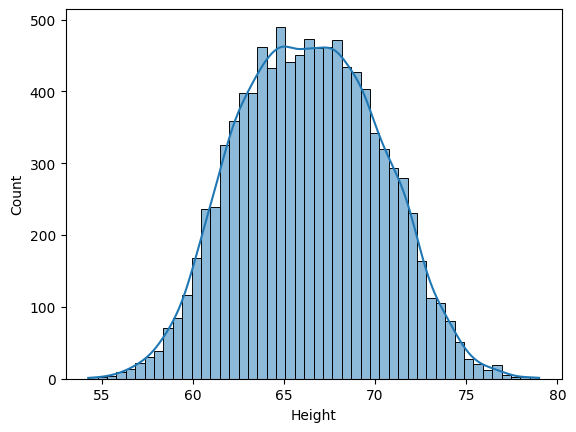

In [33]:
sns.histplot(df.Height, kde=True);

In [17]:
mean = df.Height.mean()
mean

66.367559754866

In [19]:
#std
std_deviation = df.Height.std()
std_deviation

3.847528120795573

In [20]:
mean-3*std_deviation

54.824975392479274

In [21]:
mean+3*std_deviation

77.91014411725271

__mean-3,mean+3__
**Outlier**

In [23]:
df[(df.Height < 54.82) | (df.Height > 77.91)]

,Gender,Height
994,Male,78.095867
1317,Male,78.462053
2014,Male,78.998742
3285,Male,78.528210
3757,Male,78.621374
6624,Female,54.616858
9285,Female,54.263133


**Total 7 oultier find then remove using below code**

In [24]:
df_no_outlier = df[(df.Height<77.91) & (df.Height>54.82)]
df_no_outlier.shape

(9993, 2)

**(2) Outlier detection and removal using Z Score**

Z score is a way to achieve same thing that we did above in part (1)

Z score indicates how many standard deviation away a data point is.

For example in our case mean is 66.37 and standard deviation is 3.84.

If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

Calculate the Z Score

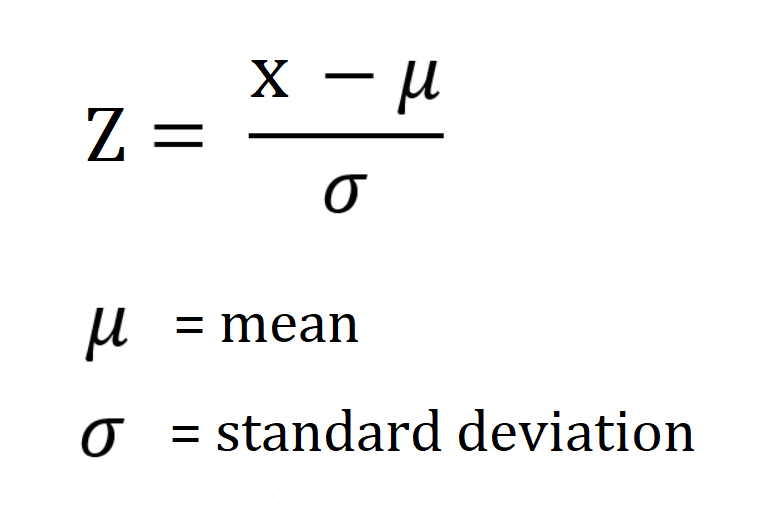

Let's add a new column in our dataframe for this Z score

In [27]:
df['zscore'] = ( df.Height - df.Height.mean() ) / df.Height.std()
df.head(5)

,Gender,Height,zscore
0,Male,73.847017,1.943964
1,Male,68.781904,0.627505
2,Male,74.110105,2.012343
3,Male,71.730978,1.393991
4,Male,69.881796,0.913375


Above for first record with height 73.84, z score is 1.94. This means 73.84 is 1.94 standard deviation away from mean

In [28]:
df.Height.mean()

66.367559754866

In [29]:
df.Height.std()

3.847528120795573

**(First record value height - height mean)/ height std**

In [34]:
(73.84-66.36)/3.84

1.9479166666666679

In [31]:
df[df['zscore']>3]

,Gender,Height,zscore
994,Male,78.095867,3.048271
1317,Male,78.462053,3.143445
2014,Male,78.998742,3.282934
3285,Male,78.528210,3.160640
3757,Male,78.621374,3.184854


In [32]:
df[df['zscore']<-3]

,Gender,Height,zscore
6624,Female,54.616858,-3.054091
9285,Female,54.263133,-3.146027
